## Importing python libraries, which contain functions we will use to run our statistics, make plots, etc.

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import pysal

/home/rave/anaconda3/envs/geo/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [347]:
type(3.0)

float

In [348]:
type("3")

str

In [349]:
north_slope_soil_moisture = pd.read_excel("3-26SoilMoistureHillslope/Soil Moisture Hillslope.xlsx")

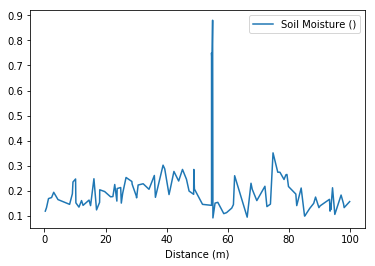

In [352]:
north_slope_soil_moisture.plot(x="Distance (m)", y="Soil Moisture ()")

In [3]:
distance_meters = np.array(north_slope_soil_moisture['Distance (m)'])

In [4]:
def distance_matrix_2D(x_distances, y_distances):
    
    row_arr_x = np.tile(x_distances, (len(x_distances),1))
    col_arr_x = row_arr_x.T
    
    row_arr_y = np.tile(y_distances, (len(y_distances),1))
    col_arr_y = row_arr_y.T
    
    return np.sqrt((row_arr_x-col_arr_x)**2+(row_arr_y-col_arr_y)**2)

distance_matrix = distance_matrix_2D(distance_meters, np.zeros(distance_meters.shape))
distance_matrix

array([[ 0.  ,  0.4 ,  1.05, ..., 97.5 , 97.7 , 99.5 ],
       [ 0.4 ,  0.  ,  0.65, ..., 97.1 , 97.3 , 99.1 ],
       [ 1.05,  0.65,  0.  , ..., 96.45, 96.65, 98.45],
       ...,
       [97.5 , 97.1 , 96.45, ...,  0.  ,  0.2 ,  2.  ],
       [97.7 , 97.3 , 96.65, ...,  0.2 ,  0.  ,  1.8 ],
       [99.5 , 99.1 , 98.45, ...,  2.  ,  1.8 ,  0.  ]])

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [195]:
distance, distance_threshold = 1, .1

measure_arr = np.array(north_slope_soil_moisture['Soil Moisture ()'])
row_arr = np.tile(measure_arr, (len(measure_arr),1))
col_arr = row_arr.T

tril_distance_arr = np.tril(distance_matrix)
cond = np.logical_and(((distance-distance_threshold) < tril_distance_arr), (tril_distance_arr < (distance+distance_threshold)))

col_vals = np.where(cond, col_arr, np.nan)
row_vals = np.where(cond, row_arr, np.nan)


In [196]:
np.count_nonzero(~np.isnan(col_vals))

19

In [197]:
np.count_nonzero(~np.isnan(row_vals))

19

In [203]:
col_vals.shape

(100, 100)

non nan indices of col array

In [209]:
np.indices(col_vals.shape)[0][~np.isnan(col_vals)]

array([ 2,  3,  7,  8,  9, 10, 11, 16, 18, 19, 29, 57, 58, 63, 77, 82, 87,
       94, 98])

In [212]:
product = col_vals*row_vals

In [213]:
np.indices(product.shape)[0][~np.isnan(product)]

array([ 2,  3,  7,  8,  9, 10, 11, 16, 18, 19, 29, 57, 58, 63, 77, 82, 87,
       94, 98])

In [210]:
np.indices(row_vals.shape)[0][~np.isnan(row_vals)]

array([ 2,  3,  7,  8,  9, 10, 11, 16, 18, 19, 29, 57, 58, 63, 77, 82, 87,
       94, 98])

array([0.33955197, 0.44282337, 0.33570932, 0.379838  , 0.90108258,
       0.67130603, 0.09170483, 0.27511348, 0.8105893 , 0.99835368,
       0.97972664, 0.75428939, 0.94610197, 0.00879478, 0.03161444,
       0.34967873, 0.21742107, 0.80703777, 0.34729245, 0.92180236,
       0.62890055, 0.04986362, 0.58888424, 0.21897008, 0.09987382,
       0.9890097 , 0.17179158, 0.73538754, 0.1278312 , 0.03631726,
       0.56926201, 0.12998837, 0.62639251, 0.46417776, 0.82944013,
       0.60789874, 0.32822497, 0.58186373, 0.87153171, 0.16206487,
       0.62607872, 0.29861712, 0.2720944 , 0.24926805, 0.14576831,
       0.43047884, 0.31014809, 0.88275915, 0.1341702 , 0.84499868,
       0.53615171, 0.32143876, 0.29672428, 0.70269444, 0.49766007,
       0.81387163, 0.83686947, 0.26867821, 0.46945403, 0.98855641,
       0.42736608, 0.57391128, 0.90481601, 0.17271203, 0.21488678,
       0.68240094, 0.50675063, 0.45568994, 0.88409078, 0.87097839,
       0.64025023, 0.61578778, 0.64351705, 0.45401877, 0.53135

In [263]:
def single_lag_correlation(distance_arr, measure_arr, distance, distance_thresh):
    """
    Takes a 2D distance matrix that has the distances between each measurement
    and a 1D array of the measurements. Distance is the center distance to correlate
    on and the threshold is the range of distances from the center distance to use for 
    the correlation.
    """
    
    row_arr = np.tile(measure_arr, (len(measure_arr),1))
    col_arr = row_arr.T
    
    tril_distance_arr = np.tril(distance_arr)
    cond = np.logical_and(((distance-distance_thresh) < tril_distance_arr), (tril_distance_arr < (distance+distance_thresh)))

    col_vals = np.where(cond, col_arr, np.nan)
    row_vals = np.where(cond, row_arr, np.nan)
    
    covariance = (np.nanmean((col_vals - np.nanmean(col_vals)) * (row_vals - np.nanmean(row_vals))))
    print("# values used for correlation " + str(np.count_nonzero(~np.isnan(col_vals))))
    return covariance/(np.nanstd(col_vals)*np.nanstd(row_vals))
    
single_lag_correlation(distance_matrix, np.array(north_slope_soil_moisture['Soil Moisture ()']), 10, .10)  
    


# values used for correlation 16


0.25087572397942604

In [338]:
len(sin_arr)

100

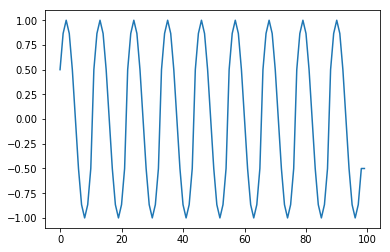

In [354]:
plt.plot(sin_arr)

In [ ]:
def single_lag_correlation_test_neg_corr(distance_arr, measure_arr, distance, distance_thresh):
    """
    Test of above, unfinsished. Takes a 2D distance matrix that has the distances between each measurement
    and a 1D array of the measurements. Distance is the center distance to correlate
    on and the threshold is the range of distances from the center distance to use for 
    the correlation.
    """
    
    row_arr = np.tile(measure_arr, (len(measure_arr),1))
    col_arr = np.tile(-1*measure_arr, (len(measure_arr),1)).T
    
    tril_distance_arr = np.tril(distance_arr)
    cond = np.logical_and(((distance-distance_thresh) < tril_distance_arr), (tril_distance_arr < (distance+distance_thresh)))

    col_vals = np.where(cond, col_arr, np.nan)
    row_vals = np.where(cond, row_arr, np.nan)
    
    covariance = (np.nanmean((col_vals - np.nanmean(col_vals)) * (row_vals - np.nanmean(row_vals))))
    print("# values used for correlation " + str(np.count_nonzero(~np.isnan(col_vals))))
    return covariance/(np.nanstd(col_vals)*np.nanstd(row_vals))

Find the optimal sampling size for the distance threshold by doubling the length of the sin time sieres to see where the noise is interjected

In [342]:
sin_arr = np.append(np.tile((np.sin(np.arange(30, 360, 30)*np.pi/180)), 9).flatten(), -.5)
single_lag_correlation(distance_matrix, sin_arr, 20, 5)  

# values used for correlation 753


0.01291142165237736

In [353]:
sin_arr

array([ 5.00000000e-01,  8.66025404e-01,  1.00000000e+00,  8.66025404e-01,
        5.00000000e-01,  1.22464680e-16, -5.00000000e-01, -8.66025404e-01,
       -1.00000000e+00, -8.66025404e-01, -5.00000000e-01,  5.00000000e-01,
        8.66025404e-01,  1.00000000e+00,  8.66025404e-01,  5.00000000e-01,
        1.22464680e-16, -5.00000000e-01, -8.66025404e-01, -1.00000000e+00,
       -8.66025404e-01, -5.00000000e-01,  5.00000000e-01,  8.66025404e-01,
        1.00000000e+00,  8.66025404e-01,  5.00000000e-01,  1.22464680e-16,
       -5.00000000e-01, -8.66025404e-01, -1.00000000e+00, -8.66025404e-01,
       -5.00000000e-01,  5.00000000e-01,  8.66025404e-01,  1.00000000e+00,
        8.66025404e-01,  5.00000000e-01,  1.22464680e-16, -5.00000000e-01,
       -8.66025404e-01, -1.00000000e+00, -8.66025404e-01, -5.00000000e-01,
        5.00000000e-01,  8.66025404e-01,  1.00000000e+00,  8.66025404e-01,
        5.00000000e-01,  1.22464680e-16, -5.00000000e-01, -8.66025404e-01,
       -1.00000000e+00, -

In [343]:
def calculate_autocorrelations(distance_arr, measure_arr, distance_thresh, distance_min, distance_max, 
                               distance_increment):
    """Calculates the autocorrelations across the min and max distances by the distance increment
    which should be at least 3 times the distance threshold. Returns a dictionary with the distances as
    keys and the correlations as values."""
    corrs = {}
    for i in np.arange(distance_min, distance_max, distance_increment):
        corrs.update({i: single_lag_correlation(distance_arr, 
                    np.array(measure_arr), 
                    distance = i, distance_thresh = distance_thresh)})
    df = pd.DataFrame(list(corrs.items()))
    df.columns = ['distance','correlation']
    return df
df = calculate_autocorrelations(distance_matrix, sin_arr, 
                           distance_thresh=.1, distance_min = 2, distance_max = 40, distance_increment = .3)

# values used for correlation 31
# values used for correlation 10
# values used for correlation 15
# values used for correlation 16
# values used for correlation 13
# values used for correlation 29
# values used for correlation 14
# values used for correlation 20
# values used for correlation 16
# values used for correlation 13
# values used for correlation 23
# values used for correlation 17
# values used for correlation 18
# values used for correlation 18
# values used for correlation 23
# values used for correlation 16
# values used for correlation 24
# values used for correlation 20
# values used for correlation 9
# values used for correlation 24
# values used for correlation 18
# values used for correlation 15
# values used for correlation 16
# values used for correlation 16
# values used for correlation 13
# values used for correlation 19
# values used for correlation 17
# values used for correlation 14
# values used for correlation 19
# values used for correlation 18
# values us

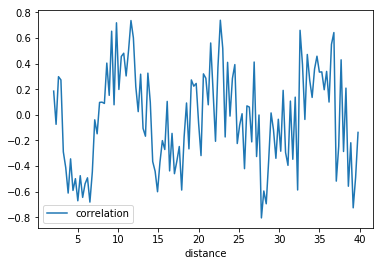

In [344]:
df.plot(x = 'distance', y='correlation')

# values used for correlation 31
# values used for correlation 10
# values used for correlation 15
# values used for correlation 16
# values used for correlation 13
# values used for correlation 29
# values used for correlation 14
# values used for correlation 20
# values used for correlation 16
# values used for correlation 13
# values used for correlation 23
# values used for correlation 17
# values used for correlation 18
# values used for correlation 18
# values used for correlation 23
# values used for correlation 16
# values used for correlation 24
# values used for correlation 20
# values used for correlation 9
# values used for correlation 24
# values used for correlation 18
# values used for correlation 15
# values used for correlation 16
# values used for correlation 16
# values used for correlation 13
# values used for correlation 19
# values used for correlation 17
# values used for correlation 14
# values used for correlation 19
# values used for correlation 18
# values us

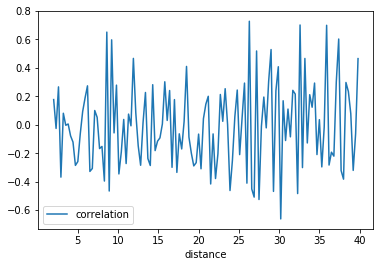

In [304]:
def test_autocorr_random():
    x = np.random.rand(100)
    df = calculate_autocorrelations(distance_matrix, np.random.rand(100), 
                           distance_thresh=.1, distance_min = 2, 
                           distance_max = 40, distance_increment = .3)
    df.plot(x = 'distance', y='correlation')
test_autocorr_random()

In [173]:
def test_random_corr():
    x = np.random.rand(100)
    y = -1*x

    covariance = (np.nanmean((x - np.nanmean(x)) * (y - np.nanmean(y))))
    return covariance/(np.nanstd(x)*np.nanstd(y))
test_random_corr()

-1.0

### Soil Mositure Histogram

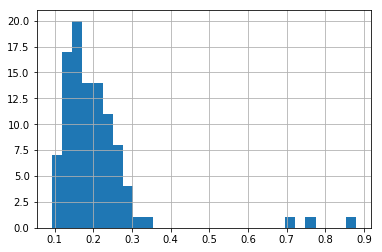

In [7]:
north_slope_soil_moisture['Soil Moisture ()'].hist(bins=30)